# AMHE Centroid Influence

__Richard Staszkiewicz__

__Igor Matynia__

The notebook is supposed to be run on Google Collaboratory. It explores the influence the different centroid counting has on the DES algorithm performnnce. The algorithm is faced with an optimization problem of the chosen benchmark functions accessed with curtasy of [Axel Thevenot](https://github.com/AxelThevenot/Python_Benchmark_Test_Optimization_Function_Single_Objective).

In [ ]:
!git clone https://github.com/AxelThevenot/Python_Benchmark_Test_Optimization_Function_Single_Objective.git

In [5]:
from modules.DES import des_classic
from modules.centroids import *
import numpy as np
np.random.seed(999)

## Example test rundown

In [2]:
par = [-100, -100, -100, -100]
fn = (
    lambda x: x[0] ** 2 + x[1] ** 2 + x[2] ** 2 + x[3] ** 2
)  # Example fitness function
kwargs = {
    "upper": np.array([-5, -23.3, 14, 11]),
    "lower": np.array([-101, -101, -101, -150]),
    "stopfitness": 1e-10,
    "lambda": 5,
    "time": 5,
    "centroid_fc": mean_centroid,
    "diag": True,
} # additional arguments
for c in [vanila_centroid,  mean_centroid, median_centroid, interquartile_centroid, windsor_centroid]:
    kwargs['centroid_fc'] = c
    result = des_classic(par, fn, **kwargs)
    print(result['par'])

[-5.000000000000001, -23.3, -5.289876646712978e-07, -3.049568994002879e-08]
[-5.000000000000003, -23.300000000000004, -2.0385604403544422e-07, 1.8388295825349185e-07]
[-5.000000000000005, -23.3, 8.556019743129963e-07, -1.2715082278146152e-06]
[-5.000000000000005, -23.3, -2.030452051164453e-07, -5.7573291071437434e-08]
[-6.793247047444978, -23.300335399660533, 0.7312400050379512, 0.3333445516287985]


## Trials with real functions

In [2]:
import Python_Benchmark_Test_Optimization_Function_Single_Objective.pybenchfunction as bench

/home/richard/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Testing the sufficiency of the bench functions

In [18]:
for f in bench.get_functions(None):
    f = f(2)
    if not f.is_dim_compatible(2):
        print(f'{f}: {f.is_dim_compatible(2)}')

In [82]:
x = []
for f in bench.get_functions(None):
    f = f(2)
    x.append(f.input_domain)
np.unique(x)

array([-600.        , -500.        , -100.        ,  -65.536     ,
        -35.        ,  -32.        ,  -10.        ,   -6.28318531,
         -5.12      ,   -5.        ,   -4.        ,   -2.        ,
         -1.28      ,   -1.        ,    0.        ,    1.        ,
          1.28      ,    2.        ,    3.14159265,    4.        ,
          5.        ,    5.12      ,    6.28318531,   10.        ,
         32.        ,   35.        ,   65.536     ,  100.        ,
        500.        ,  600.        ])

In [83]:
for f in bench.get_functions(None):
    try:
        f = f(2)
        x_min, m = f.get_global_minimum(2)
        if x_min.any() > 100 or x_min.any() <-100:
            print(x_min)
    except Exception as e:
        print(f'Unable to check the global minimum of: {f.name}')

Unable to check the global minimum of: Ackley
WARNING ! Is only is available for d=2
Unable to check the global minimum of: Perm d, beta
Unable to check the global minimum of: Shubert


### Creating the default arguments of the DES

In [84]:
par = [-100, -100]
kwargs = {
    "upper": np.array([101, 101]),
    "lower": np.array([-101, -101]),
    "stopfitness": 1e-10,
    "lambda": 20,
    "time": 5,
    "diag": True,
}

### Trials

In [85]:
for f in bench.get_functions(None):
    try:
        f = f(2)
        x_min, m = f.get_global_minimum(2)
        kwargs["lower"] = f.input_domain.T[0]
        kwargs["upper"] = f.input_domain.T[1]
        par = f.input_domain.T[0]
        for c in [vanila_centroid,  mean_centroid, median_centroid, interquartile_centroid, windsor_centroid]:
            kwargs['centroid_fc'] = c
            result = des_classic(par, f, **kwargs)
            np.save(f'./results/{c.__qualname__}/{f.name}.npy', result, allow_pickle=True)

    except TypeError as e:
        print(f'Unable to check the global minimum of: {f.name}. Function omitted..')

Unable to check the global minimum of: Ackley. Function omitted..
WARNING ! Is only is available for d=2
Unable to check the global minimum of: Perm d, beta. Function omitted..
Unable to check the global minimum of: Shubert. Function omitted..


## Example vizualizations

In [40]:
des = np.load('results/interquartile_centroid/Ackley N. 4.npy', allow_pickle=True)[()]

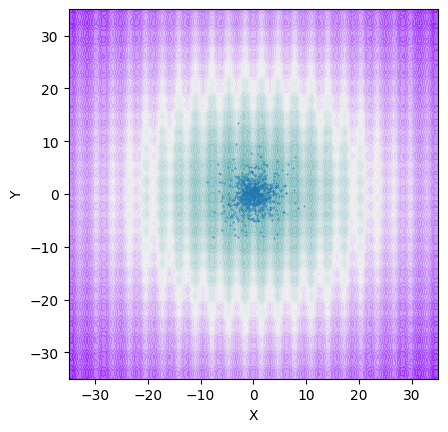

In [41]:
import matplotlib.pyplot as plt
x = bench.function.AckleyN4(2)
bench.plot_2d(x, n_space=100, ax=None, show=False)
plt.scatter(des['diagnostic']['meanCord'].T[0], des['diagnostic']['meanCord'].T[1], s=0.1)
plt.show()

## Compressing visualisations for all functions

In [45]:
f = bench.function.Sphere(2)
x_min, m = f.get_global_minimum(2)

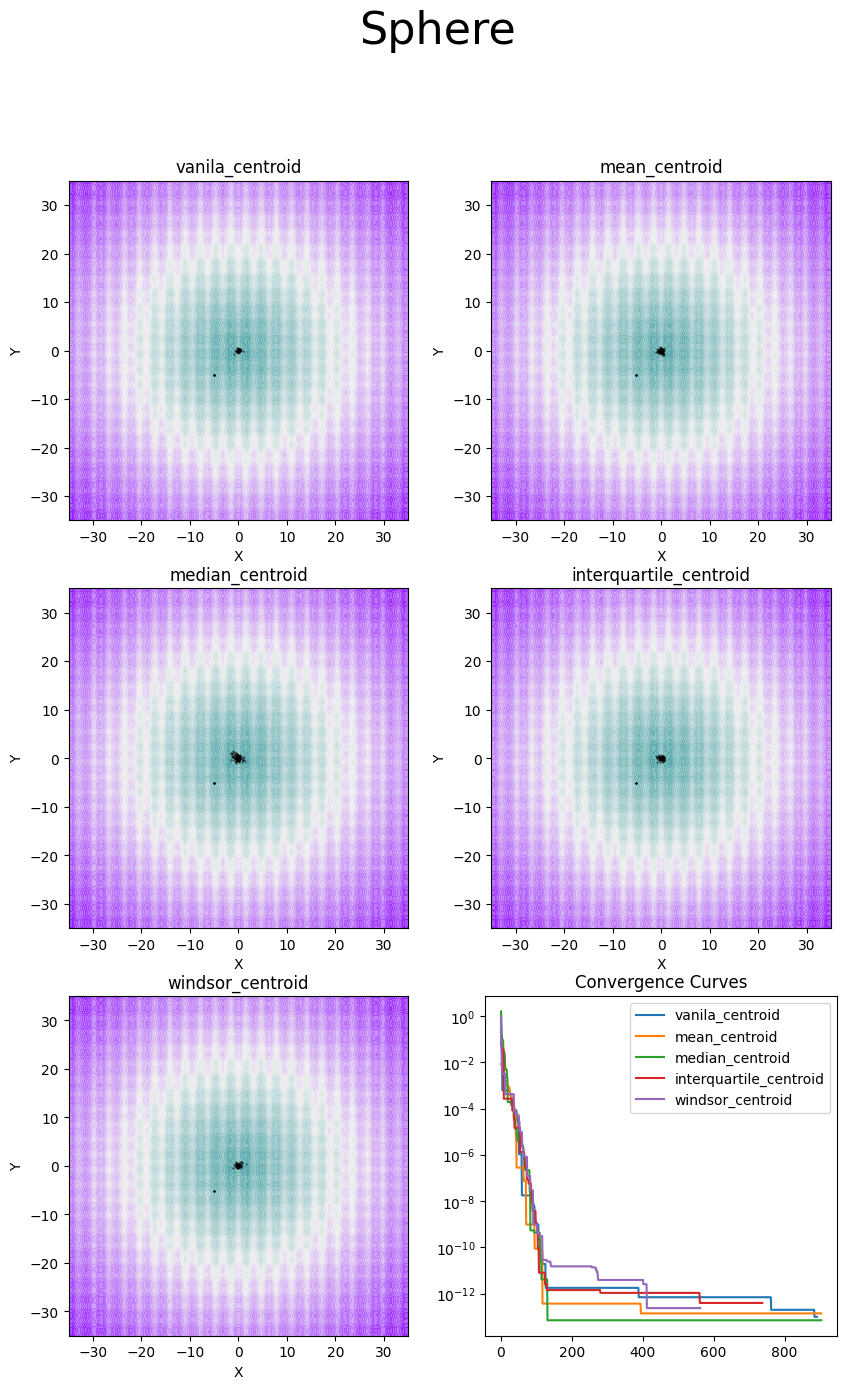

In [51]:
#for f in bench.get_functions(None):
for f in [bench.function.Sphere]:
    try:
        f = f(2)
        x_min, m = f.get_global_minimum(2)
        fig, axs = plt.subplots(3, 2, figsize=(10, 15))
        fig.suptitle(f"{f.name}", fontsize=32, fontweight=20, va="center", ha='center')
        axs[2, 1].set_yscale("log")
        axs[2, 1].set_title("Convergence Curves")
        axs[2, 1].axhline(y = m, color = 'r', linestyle = '--', linewidth=10)

        for i, c in enumerate([vanila_centroid,  mean_centroid, median_centroid, interquartile_centroid, windsor_centroid]):
            results = np.load(f'./results/{c.__qualname__}/{f.name}.npy', allow_pickle=True)[()]
            bench.plot_2d(x, n_space=100, ax=axs[i//2, i%2], show=False)
            axs[i//2, i%2].scatter(results['diagnostic']['meanCord'].T[0], results['diagnostic']['meanCord'].T[1], s=0.1, color='black')
            #axs[i//2, i%2].scatter(x_min[0], x_min[1], 'ro', s=0.2)
            axs[i//2, i%2].set_title(f"{c.__qualname__}")
            axs[2, 1].plot(range(len(results['diagnostic']['bestVal'])), results['diagnostic']['bestVal'], label=f"{c.__qualname__}")

        axs[2, 1].legend()
        plt.savefig(f'results/figures/{f.name}')
    except TypeError as e:
        print(f'Unable to check the global minimum of: {f.name}. Function omitted..')
    except FileNotFoundError as e:
        print(f'Unable to locate a results file of: {f.name}. Make sure all your results are saved as in previous code...')